# Compare simulated and experimental spectra

In [6]:
import matplotlib.pyplot as plt
import ramanchada2 as rc2
from ramanchada2.auxiliary.spectra.datasets2 import get_filenames, prepend_prefix

In [7]:
exp_spe_fn = prepend_prefix(get_filenames(provider=['ICV'], laser_wl=['785'], sample=['nCAL'], OP=['050']))[0]

In [8]:
vasp_sim_fn = rc2.auxiliary.spectra.simulated.FILES['calcite_vasp']
crystal_sim_raw_fn = rc2.auxiliary.spectra.simulated.FILES['calcite_crystal_raw']
crystal_sim_convolved_fn = rc2.auxiliary.spectra.simulated.FILES['calcite_crystal_convolved']

## read VASP simulation files for calcite and compare with experimental

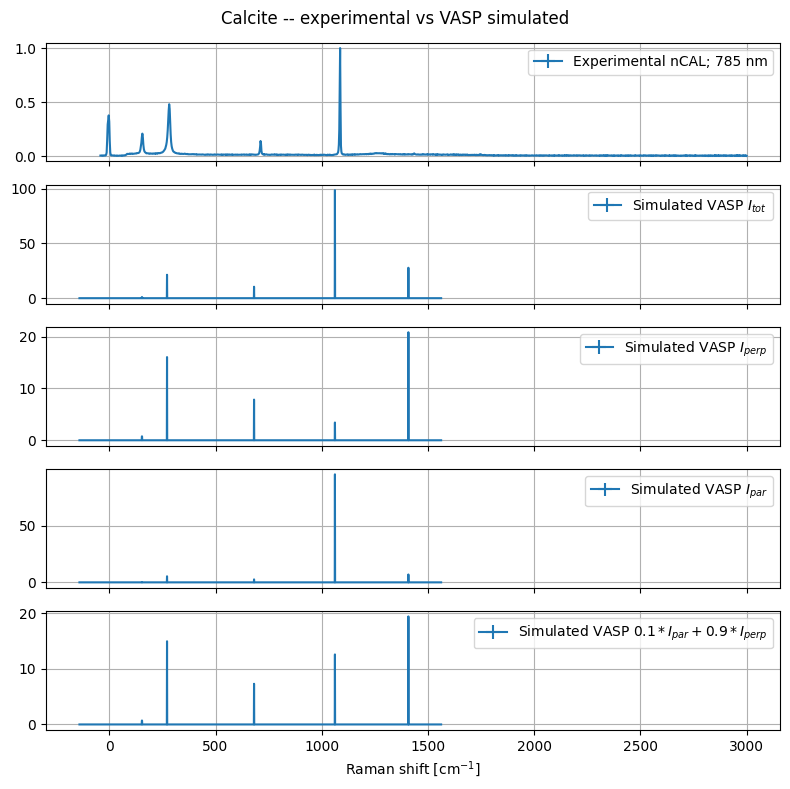

In [9]:
fig, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 8))

rc2.spectrum.from_local_file(exp_spe_fn).normalize().plot(ax=ax[0], label="Experimental nCAL; 785 nm")
rc2.spectrum.from_simulation(vasp_sim_fn, 'vasp', 'I_perp').plot(ax=ax[2], label=r'Simulated VASP $I_{perp}$')
rc2.spectrum.from_simulation(vasp_sim_fn, 'vasp', 'I_tot').plot(ax=ax[1], label=r'Simulated VASP $I_{tot}$')
rc2.spectrum.from_simulation(vasp_sim_fn, 'vasp', 'I_par').plot(ax=ax[3], label=r'Simulated VASP $I_{par}$')
rc2.spectrum.from_simulation(vasp_sim_fn, 'vasp', {'I_par':.1, 'I_perp':.9}).plot(ax=ax[4], label=r'Simulated VASP $0.1*I_{par} + 0.9*I_{perp}$')
for a in ax:
    a.legend(loc='upper right')
    a.grid()
ax[4].set_xlabel(r'Raman shift [$\mathrm{cm}^{-1}$]')
fig.suptitle('Calcite -- experimental vs VASP simulated')
fig.tight_layout()



## Compare crystal convolved and ramanchada2 convolved spectra

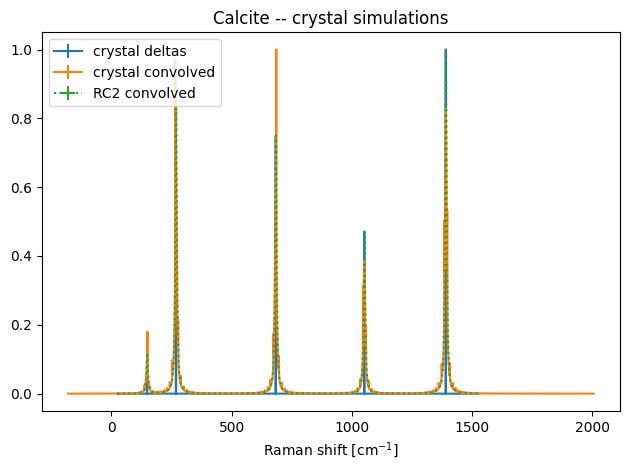

In [10]:
fig, ax = plt.subplots()


spe_convolved = rc2.spectrum.from_simulation(crystal_sim_convolved_fn, 'crystal_dat', 'I_perp')
spe_raw = rc2.spectrum.from_simulation(crystal_sim_raw_fn, 'crystal_dat', 'I_perp')

spe_raw.normalize().plot(ax=ax, label='crystal deltas')
spe_convolved.normalize().plot(ax=ax, label='crystal convolved')
spe_raw.convolve('moffat', sigma=5).normalize().plot(ax=ax, fmt=':', label='RC2 convolved')

ax.set_xlabel(r'Raman shift [$\mathrm{cm}^{-1}$]')
ax.set_title('Calcite -- crystal simulations')
fig.tight_layout()